In [1]:
!pip install --upgrade pip         # pip 19.0 or higher is required for TF 2
!pip install --upgrade setuptools  # Otherwise you'll get annoying warning

    100% |████████████████████████████████| 1.4MB 20.9MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1
     |████████████████████████████████| 583 kB 5.8 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 41.6.0
    Uninstalling setuptools-41.6.0:
      Successfully uninstalled setuptools-41.6.0


In [2]:
!pip install --user --upgrade tensorflow-gpu

     |████████████████████████████████| 421.8 MB 2.1 kB/s  eta 0:00:01    |██████▍                         | 83.6 MB 57.4 MB/s eta 0:00:06     |███████████▎                    | 148.8 MB 65.2 MB/s eta 0:00:05     |██████████████████▋             | 244.8 MB 57.2 MB/s eta 0:00:04     |████████████████████████▏       | 319.1 MB 61.5 MB/s eta 0:00:02
     |████████████████████████████████| 448 kB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 64.2 MB/s eta 0:00:01
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)
  Using cached requests-2.22.0-py2.py3-none-any.whl (57 kB)
     |████████████████████████████████| 76 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 53.9 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 41.8 MB/s eta 0:00:01
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-py3-none-any.whl size=60860 sha256=6a007ec7e7848358

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0'

In [3]:
import tensorflow.keras as keras

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
import numpy as np

In [6]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [9]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# Baseline
## Use the last value as baseline

In [37]:
y_pred = X_valid[:, -1]
result = keras.losses.mean_squared_error(y_valid, y_pred)
np.mean(result)

0.020744413

# Linear regression 

In [13]:
lin_reg = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

lin_reg.compile(loss='mean_squared_error', optimizer='adam')
history = lin_reg.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 135us/sample - loss: 0.0753 - val_loss: 0.0323
Epoch 2/20
7000/7000 [==============================] - 1s 86us/sample - loss: 0.0227 - val_loss: 0.0165
Epoch 3/20
7000/7000 [==============================] - 1s 85us/sample - loss: 0.0132 - val_loss: 0.0108
Epoch 4/20
7000/7000 [==============================] - 1s 85us/sample - loss: 0.0095 - val_loss: 0.0084
Epoch 5/20
7000/7000 [==============================] - 1s 86us/sample - loss: 0.0078 - val_loss: 0.0072
Epoch 6/20
7000/7000 [==============================] - 1s 87us/sample - loss: 0.0068 - val_loss: 0.0065
Epoch 7/20
7000/7000 [==============================] - 1s 88us/sample - loss: 0.0062 - val_loss: 0.0060
Epoch 8/20
7000/7000 [==============================] - 1s 98us/sample - loss: 0.0057 - val_loss: 0.0055
Epoch 9/20
7000/7000 [==============================] - 1s 97us/sample - loss: 0.0053 - val_loss: 0.0052
Epoch 

In [14]:
%%capture
valid_error = lin_reg.evaluate(X_valid, y_valid)

In [15]:
valid_error

0.003679195249453187

# Simple RNN

In [16]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.1430 - val_loss: 0.1422
Epoch 2/20
7000/7000 [==============================] - 7s 940us/sample - loss: 0.1400 - val_loss: 0.1414
Epoch 3/20
7000/7000 [==============================] - 7s 936us/sample - loss: 0.1399 - val_loss: 0.1430
Epoch 4/20
7000/7000 [==============================] - 7s 931us/sample - loss: 0.1399 - val_loss: 0.1400
Epoch 5/20
7000/7000 [==============================] - 7s 935us/sample - loss: 0.1393 - val_loss: 0.1396
Epoch 6/20
7000/7000 [==============================] - 7s 946us/sample - loss: 0.1392 - val_loss: 0.1399
Epoch 7/20
7000/7000 [==============================] - 7s 946us/sample - loss: 0.1397 - val_loss: 0.1416
Epoch 8/20
7000/7000 [==============================] - 7s 944us/sample - loss: 0.1403 - val_loss: 0.1413
Epoch 9/20
7000/7000 [==============================] - 7s 944us/sample - loss: 0.1405 - val_loss: 0.1401


# Deep RNN

In [38]:
deep_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)]
)

In [18]:
20*20 + 20

420

In [39]:
deep_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [40]:
deep_rnn.compile(optimizer='adam', loss='mean_squared_error')
deep_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.0180 - val_loss: 0.0044
Epoch 2/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.0041 - val_loss: 0.0035
Epoch 3/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.0036 - val_loss: 0.0033
Epoch 4/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.0035 - val_loss: 0.0032
Epoch 5/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.0033 - val_loss: 0.0031
Epoch 6/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.0033 - val_loss: 0.0032
Epoch 7/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.0031 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 19s 3ms/sample - loss: 0.0031 - val_loss: 0.0029
Epoch 9/20
7000/7000 [==============================] - 19s 3ms/sample - loss: 0.0031 - val_loss: 0.0032
Epoch 1

In [41]:
deep_rnn_dense = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)]
)
deep_rnn_dense.compile(optimizer='adam', loss='mean_squared_error')
deep_rnn_dense.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0223 - val_loss: 0.0050
Epoch 2/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0041 - val_loss: 0.0034
Epoch 3/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 4/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0032 - val_loss: 0.0036
Epoch 5/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0033 - val_loss: 0.0031
Epoch 6/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0032 - val_loss: 0.0033
Epoch 7/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0031 - val_loss: 0.0029
Epoch 9/20
7000/7000 [==============================] - 13s 2ms/sample - loss: 0.0030 - val_loss: 0.0037
Epoch 1

# Predicting N steps ahead

## Predict N times one step ahead

In [45]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = deep_rnn_dense.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [46]:
result = keras.losses.mean_squared_error(Y_new, Y_pred)
np.mean(result)

0.00803183

In [56]:
n_steps = X_new.shape[1]

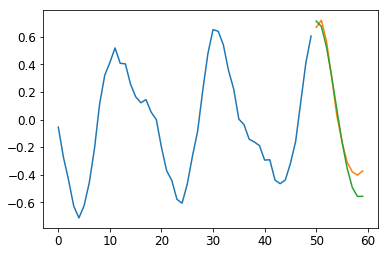

In [60]:
plt.plot(np.arange(n_steps), X_new.reshape(-1))
plt.plot(np.arange(n_steps, n_steps+10), Y_new.reshape(-1))
plt.plot(np.arange(n_steps, n_steps+10), Y_pred.reshape(-1))

# Predict N steps at once with sequence-to-vector

In [13]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [14]:
Y_train.shape

(7000, 10)

In [9]:
model_seq_to_vec = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model_seq_to_vec.compile(loss='mean_squared_error', optimizer='adam')
model_seq_to_vec.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/10
7000/7000 [==============================] - 19s 3ms/sample - loss: 0.0662 - val_loss: 0.0328
Epoch 2/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0264 - val_loss: 0.0207
Epoch 3/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0187 - val_loss: 0.0165
Epoch 4/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0165 - val_loss: 0.0159
Epoch 5/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0147 - val_loss: 0.0166
Epoch 6/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0142 - val_loss: 0.0150
Epoch 7/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 8/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0132 - val_loss: 0.0129
Epoch 9/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0128 - val_loss: 0.0127
Epoch 1

# Predict N steps at once with sequence-to-sequence

In [15]:
n_steps

50

In [16]:
Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [17]:
Y_train.shape

(7000, 50, 10)

In [13]:
model_seq_to_seq = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [21]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)

In [ ]:
model_seq_to_seq.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
model_seq_to_seq.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

In [24]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Using LSTM model

In [18]:
model_seq_to_seq_lstm = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [22]:
model_seq_to_seq_lstm.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
model_seq_to_seq_lstm.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/10
  32/7000 [..............................] - ETA: 14:59

UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/StatefulPartitionedCall]] [Op:__inference_distributed_function_5866]

Function call stack:
distributed_function -> distributed_function -> distributed_function
